<a href="https://colab.research.google.com/github/Riohn-2005/Barcelona-Catalonia-Spain-Airbnb-/blob/main/Assignment%20Brcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
import seaborn as sns

In [8]:
df1 = pd.read_csv('/content/calendar (1).csv.gz')
df2 = pd.read_csv('/content/listings (1).csv.gz')

In [ ]:
 df2.info()

dealing with df2 only

 ### asked chatgpt meaning of column heading(label)

Here’s a breakdown of the main columns (grouped by category for clarity):

🔹 Identifiers & Metadata

id – Unique identifier for the listing.

listing_url – Link to the listing on Airbnb’s website.

scrape_id – Identifier for the dataset scrape (timestamped batch).

last_scraped – Date the data was scraped.

source – Source of the scrape (usually "Airbnb").

name – Title of the listing.

description – Longer description provided by the host.

neighborhood_overview – Description of the neighborhood by the host.

picture_url – Main picture of the listing.

🔹 Host Information

host_id – Unique ID of the host.

host_url – Link to the host’s profile.

host_name – Name of the host.

host_since – Date when the host joined Airbnb.

host_location – Location given by the host.

host_about – Host’s self-description.

host_response_time – Average response time (e.g., “within an hour”).

host_response_rate – Percentage of messages the host responds to.

host_acceptance_rate – Percentage of booking requests accepted.

host_is_superhost – Whether the host is a “Superhost” (yes/no).

host_thumbnail_url / host_picture_url – Profile picture.

host_neighbourhood – Host’s neighborhood.

host_listings_count – Number of listings the host has.

host_total_listings_count – Total count across Airbnb.

host_verifications – Types of verification (e.g., email, ID, phone).

host_has_profile_pic – Yes/No.

host_identity_verified – Whether host’s identity is verified.

🔹 Location Information

neighbourhood – Neighborhood name (raw).

neighbourhood_cleansed – Standardized Airbnb neighborhood.

neighbourhood_group_cleansed – Larger geographic grouping (sometimes empty).

latitude / longitude – Geo-coordinates of the listing.

🔹 Property & Room Information

property_type – Type (Apartment, House, etc.).

room_type – Type of room (Entire home/apt, Private room, Shared room).

accommodates – Maximum number of guests.

bathrooms – Number of bathrooms (numeric, may have missing values).

bathrooms_text – Text version (e.g., “1.5 shared baths”).

bedrooms – Number of bedrooms.

beds – Number of beds.

amenities – List of amenities (Wi-Fi, AC, kitchen, etc.).

🔹 Price & Nights

price – Price per night (string with currency).

minimum_nights / maximum_nights – Booking restrictions.

minimum_minimum_nights / maximum_minimum_nights – Observed limits over time.

minimum_maximum_nights / maximum_maximum_nights – Same idea but for maximum nights.

minimum_nights_avg_ntm / maximum_nights_avg_ntm – Average minimum/maximum nights over the year.

🔹 Availability & Calendar

calendar_updated – Deprecated (always null in new datasets).

has_availability – Whether the listing is bookable.

availability_30 / 60 / 90 / 365 – Number of days available in the next 30, 60, 90, 365 days.

calendar_last_scraped – Last date availability calendar was scraped.

availability_eoy – Availability till end of year.

🔹 Reviews

number_of_reviews – Total reviews.

number_of_reviews_ltm – Reviews in the last 12 months.

number_of_reviews_l30d – Reviews in the last 30 days.

number_of_reviews_ly – Reviews in the last year.

reviews_per_month – Average reviews per month.

first_review / last_review – Dates of first and last reviews.

review_scores_rating – Overall rating (out of 100).

review_scores_accuracy / cleanliness / checkin / communication / location / value – Subscores.

🔹 Business Metrics

license – License number (if required by the city).

instant_bookable – Whether guests can book instantly.

calculated_host_listings_count – Number of listings by the host at scrape time.

calculated_host_listings_count_entire_homes / private_rooms / shared_rooms – Counts broken down by room type.

estimated_occupancy_l365d – Estimated occupancy over last 365 days (calculated metric).

estimated_revenue_l365d – Estimated yearly revenue from the listing.

# important labels were:

neighbourhood – Neighborhood name (raw).

neighbourhood_cleansed – Standardized Airbnb neighborhood. *

property_type – Type (Apartment, House, etc.)

room_type – Type of room (Entire home/apt, Private room, Shared room)

accommodates – Maximum number of guests.

bedrooms – Number of bedrooms.

beds – Number of beds.

amenities – List of amenities (Wi-Fi, AC, kitchen, etc.)

price – Price per night (string with currency).

number_of_reviews – Total reviews.

review_scores_rating – Overall rating (out of 100).

instant_bookable – Whether guests can book instantly.


In [75]:
data = df2[[ 'host_since','host_identity_verified','neighbourhood_cleansed','property_type',
            'room_type','accommodates','bedrooms','beds','amenities','price',
             'number_of_reviews','review_scores_rating','instant_bookable','neighbourhood_group_cleansed']]

In [76]:
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3342614011.py:1: SyntaxWarning: invalid escape sequence '\$'
  data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-3342614011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
data.head()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_since              18924 non-null  object 
 1   host_identity_verified  18924 non-null  object 
 2   neighbourhood_cleansed  18927 non-null  object 
 3   property_type           18927 non-null  object 
 4   room_type               18927 non-null  object 
 5   accommodates            18927 non-null  int64  
 6   bedrooms                16870 non-null  float64
 7   beds                    14874 non-null  float64
 8   amenities               18927 non-null  object 
 9   price                   14913 non-null  float64
 10  number_of_reviews       18927 non-null  int64  
 11  review_scores_rating    13929 non-null  float64
 12  instant_bookable        18927 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.9+ MB


In [9]:
data.isna().sum() #checking empty data
#data.describe()

,0
host_since,3
host_identity_verified,3
neighbourhood_cleansed,0
property_type,0
room_type,0
accommodates,0
bedrooms,2057
beds,4053
amenities,0
price,4014


as a tourist i would want to stay with only verifired hosts

In [11]:
safe = data[data['host_identity_verified'] == 't']
safe.info()
safe.isna().sum() , safe.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 17221 entries, 0 to 18921
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_since              17221 non-null  object 
 1   host_identity_verified  17221 non-null  object 
 2   neighbourhood_cleansed  17221 non-null  object 
 3   property_type           17221 non-null  object 
 4   room_type               17221 non-null  object 
 5   accommodates            17221 non-null  int64  
 6   bedrooms                15852 non-null  float64
 7   beds                    14160 non-null  float64
 8   amenities               17221 non-null  object 
 9   price                   14198 non-null  float64
 10  number_of_reviews       17221 non-null  int64  
 11  review_scores_rating    12886 non-null  float64
 12  instant_bookable        17221 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.8+ MB


(host_since                   0
 host_identity_verified       0
 neighbourhood_cleansed       0
 property_type                0
 room_type                    0
 accommodates                 0
 bedrooms                  1369
 beds                      3061
 amenities                    0
 price                     3023
 number_of_reviews            0
 review_scores_rating      4335
 instant_bookable             0
 dtype: int64,
        accommodates      bedrooms          beds         price  \
 count  17221.000000  15852.000000  14160.000000  14198.000000   
 mean       3.441902      1.859891      2.512218    213.155937   
 std        2.300042      1.361294      2.280894    385.910503   
 min        1.000000      0.000000      0.000000      9.000000   
 25%        2.000000      1.000000      1.000000     73.000000   
 50%        3.000000      2.000000      2.000000    140.000000   
 75%        4.000000      2.000000      3.000000    252.000000   
 max       16.000000     29.000000    127

In [ ]:
#code for only data where price is na
safe[safe['price'].isna()  ]


Average price per neighborhood

<Axes: xlabel='neighbourhood_cleansed'>

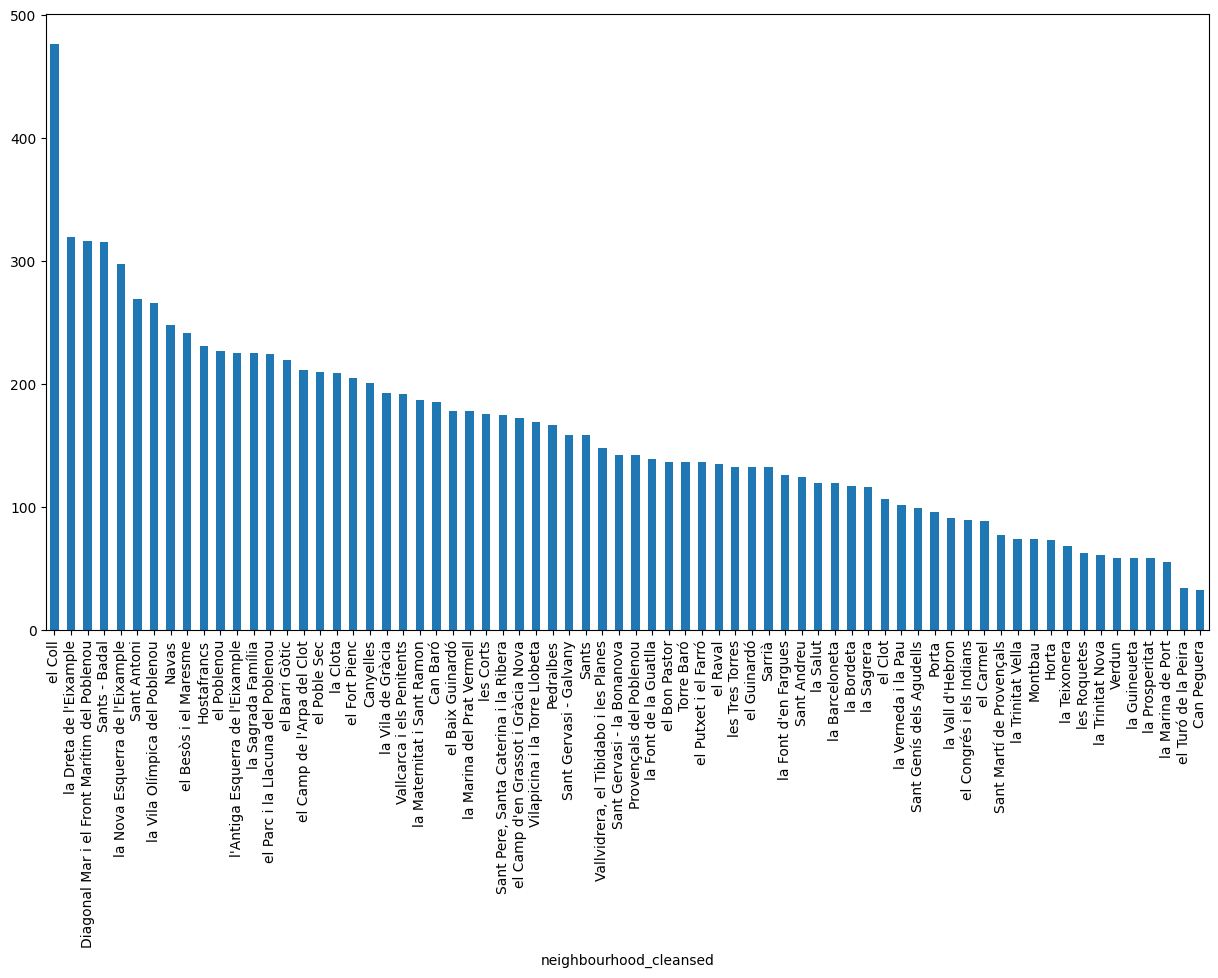

In [50]:
#safe.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
#safe.groupby('neighbourhood_cleansed')['price'].mean().describe()
plt.figure(figsize=(15,8))
safe.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).plot(kind='bar')



<Axes: xlabel='neighbourhood_group_cleansed'>

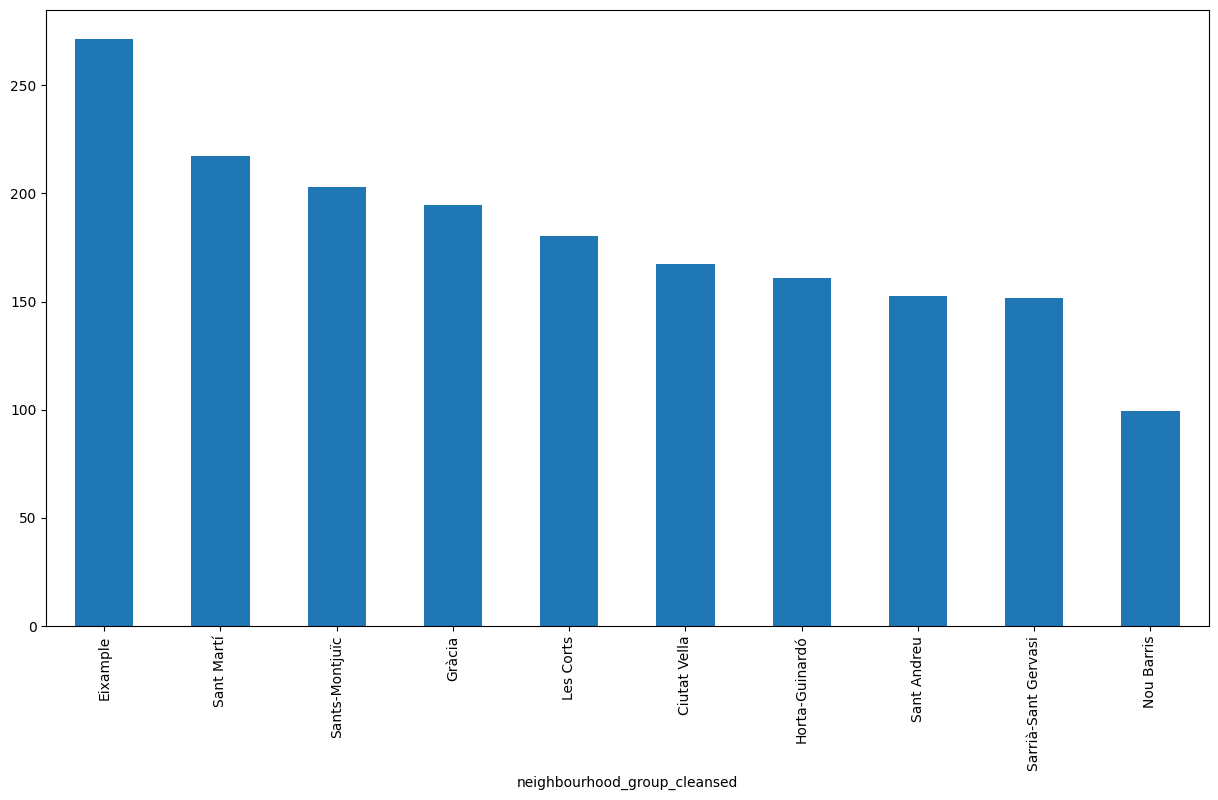

In [78]:
#len(df2['neighbourhood_group_cleansed'].unique())
plt.figure(figsize=(15,8))
data.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False).plot(kind='bar')

before using corr you have to standardisee

<Axes: >

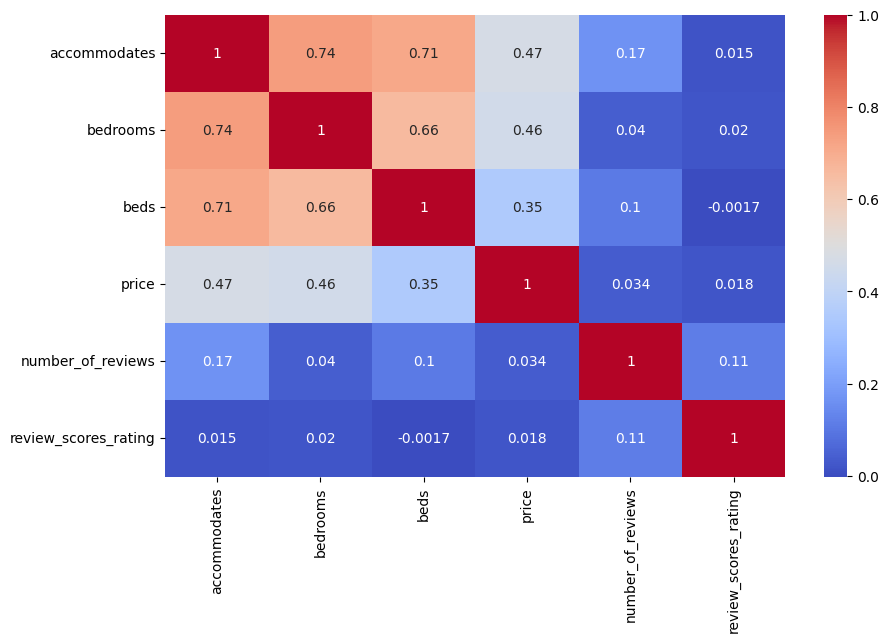

In [49]:
import seaborn as sns
plt.figure(figsize=(10,6))

corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
#corr = df2.corr(numeric_only= True)
#sns.heatmap(corr, annot=False, cmap='coolwarm')
